In [16]:
#Import Modules to Code
import numpy
import numpy as np
import math as m
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import quad, dblquad
import scipy.special as sp
import scipy.constants as cn
import numpy
import numpy as np
import math as m
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import quad, dblquad
import scipy.constants as cn
import scipy.special as sp
import astropy.units as u
from agnpy.emission_regions import Blob
from agnpy.synchrotron import Synchrotron
from agnpy.utils.plot import plot_sed
from numpy import linspace, random
from scipy.optimize import leastsq

In [17]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 98% !important; }</style>"))

In [18]:
##Physical Constants
kpc = 3.085677558128*10**21
pc = 3.085677558128*10**18
fortio =4.80*10**(-10)
c = 2.997925*10**10
me =9.109*10**(-28)
mp = 1.672614*10**(-24)
hpl = 6.25*10**(-27)
Ro=50*pc
d_L= 18.5*10**3*kpc#(source luminosity distance):1.00e+27 cm
B=0.001 #s.f.p

In [19]:
##Free Parameters
gmin_e = 1.2*10**5
gmax_e = 10**6

gmin_p = 3*10**4
gmax_p = 3*10**5

ps_e = 4.4
ps_p = 2

No_e=6.5*10**50 #f.p
No_p=1.5*10**56

In [20]:
##Power estimation
#Electrons power [erg/s]
def p_e(n,gmin_e,gmax_e,ps_e,No_e):
    Res=np.zeros(len(n))
    for i in range(len(n)):
        dumm = n[i]        
        res = dblquad(lambda x, g: ((No_e*(-ps_e+1)/((me*c**2)**(-ps_e+1)*(gmax_e**(-ps_e+1)-gmin_e**(-ps_e+1)))*4*cn.pi*fortio**2*me*c*(me*c**2)**(-ps_e))/3)*dumm*g**(-2-ps_e)*(9+36*x**2+16*x**4)/((3+4*x**2)*m.sqrt(1+(x**2)/3))*np.exp(-dumm*4*cn.pi*me*c*(1+(4*x**2)/3)*m.sqrt(1+x**2/3)/(g**2*3*fortio*B)), gmin_e, gmax_e, lambda x: 0, lambda x: np.inf)
        Res[i] = res[0]
    return Res



v = numpy.logspace(8,10,10)
       

In [21]:
#Absorption Part
def abs_e(n,gmin_e,gmax_e,ps_e,No_e):
    Res=np.zeros(len(n))
    for i in range(len(n)):
        dumm = n[i]       
        res = dblquad(lambda x, g: No_e*(-ps_e+1)/(4*cn.pi*Ro**3*(me*c**2)**(-ps_e+1)*(gmax_e**(-ps_e+1)-gmin_e**(-ps_e+1)))*(ps_e+2)*fortio**2*(me*c**2)**(-ps_e)*c/(6)*(g**(-ps_e-3)/dumm)*(9+36*x**2+16*x**4)/((3+4*x**2)*m.sqrt(1+(x**2)/3))*np.exp(-dumm*4*cn.pi*me*c*(1+(4*x**2)/3)*m.sqrt(1+x**2/3)/(g**2*3*fortio*B)), gmin_e, gmax_e, lambda x: 0, lambda x: np.inf, epsabs=1.49e-28, epsrel=1.49e-18)
        Res[i] = res[0]
    return Res

#def fabs_e(n,gmin_e,gmax_e,ps_e,No_e):
#    Res=np.zeros(len(n))
#    for i in range(len(n)):
#        dumm = n[i]    
#        res =  cn.pi*Ro**2*p_e(n,gmin_e,gmax_e,ps_e,No_e)[0]*(-np.expm1(-abs_e(n,gmin_e,gmax_e,ps_e,No_e)[0]*Ro))/(d_L**2*(4*cn.pi)**2*Ro**3*abs_e(n,gmin_e,gmax_e,ps_e,No_e)[0])        
#    return res

def fabs_e(n,gmin_e,gmax_e,ps_e,No_e): 
    res =  cn.pi*Ro**2*p_e(n,gmin_e,gmax_e,ps_e,No_e)*(-np.expm1(-abs_e(n,gmin_e,gmax_e,ps_e,No_e)*Ro))/(d_L**2*(4*cn.pi)**2*Ro**3*abs_e(n,gmin_e,gmax_e,ps_e,No_e))        
    return res
    
    
Fabs_e=v*0
        
   

In [22]:
#Proton power [erg/s]
def p_p(n,gmin_p,gmax_p,ps_p,No_p):
    Res=np.zeros(len(n))
    for i in range(len(n)):
        dumm = n[i]    
        res = dblquad(lambda x, g: ((No_p*(-ps_p+1)/((mp*c**2)**(-ps_p+1)*(gmax_p**(-ps_p+1)-gmin_p**(-ps_p+1)))*4*cn.pi*fortio**2*mp*c*(mp*c**2)**(-ps_p))/3)*dumm*g**(-2-ps_p)*(9+36*x**2+16*x**4)/((3+4*x**2)*m.sqrt(1+(x**2)/3))*np.exp(-dumm*4*cn.pi*mp*c*(1+(4*x**2)/3)*m.sqrt(1+x**2/3)/(g**2*3*fortio*B)), gmin_p, gmax_p, lambda x: 0, lambda x: np.inf)
        Res[i] = res[0]
    return Res


In [23]:
def abs_p(n,gmin_p,gmax_p,ps_p,No_p):
    Res=np.zeros(len(n))
    for i in range(len(n)):
        dumm = n[i]    
        res = dblquad(lambda x, g: No_p*(-ps_p+1)/(4*cn.pi*Ro**3*(mp*c**2)**(-ps_p+1)*(gmax_p**(-ps_p+1)-gmin_p**(-ps_p+1)))*(ps_p+2)*fortio**2*(mp*c**2)**(-ps_p)*c/(6)*(g**(-ps_p-3)/dumm)*(9+36*x**2+16*x**4)/((3+4*x**2)*m.sqrt(1+(x**2)/3))*np.exp(-dumm*4*cn.pi*mp*c*(1+(4*x**2)/3)*m.sqrt(1+x**2/3)/(g**2*3*fortio*B)), gmin_p, gmax_p, lambda x: 0, lambda x: np.inf, epsabs=1.49e-28, epsrel=1.49e-18)
        Res[i] = res[0]
    return Res

def fabs_p(n,gmin_p,gmax_p,ps_p,No_p): 
    res =  cn.pi*Ro**2*p_p(n,gmin_p,gmax_p,ps_p,No_p)*(-np.expm1(-abs_p(n,gmin_p,gmax_p,ps_p,No_p)*Ro))/(d_L**2*(4*cn.pi)**2*Ro**3*abs_p(n,gmin_p,gmax_p,ps_p,No_p))        
    return res

Fabs_p=v*0


In [24]:
def fall(n,gmin_e,gmax_e,ps_e,No_e,gmin_p,gmax_p,ps_p,No_p): 
    res = np.nan_to_num(fabs_e(n,gmin_e,gmax_e,ps_e,No_e))+np.nan_to_num(fabs_p(n,gmin_p,gmax_p,ps_p,No_p))
    return res

In [25]:
logdv = np.array([9.177536,9.686636,9.927370,10.988960,11.372912,14.522444,14.800029,14.950365,15.123852])
lognFn = -np.array([15.84841,15.36888,15.29448,14.99820,15.14997,13.30146,13.51873,13.61827,13.73002])
elognFn = -np.array([15.80702,15.32749,15.25309,14.95681,15.10857,13.15534,13.34264,13.55827,13.69430])
ElognFn = -np.array([15.89417,15.41464,15.34024,15.04396,15.19572,13.52331,13.81976,13.68791,13.76894])
#-----------------------------------------------------------------------------------------------------
dv=10**logdv
nFn=10**lognFn
enFn=10**elognFn
EnFn=10**ElognFn

err=nFn-enFn
Err=EnFn-nFn

asymmetric_error = [err,Err]

In [26]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [27]:
from lmfit import Minimizer, Parameters, report_fit
x = dv
data = nFn

# define objective function: returns the array to be minimized
def fcn2min(params, x, data):
    """Model a decaying sine wave and subtract data."""
    gmin_e = params['gmin_e']
    gmax_e = params['gmax_e']
    ps_e = params['ps_e']
    No_e = params['No_e']
    gmin_p = params['gmin_p']
    gmax_p = params['gmax_p']
    ps_p = params['ps_p']
    No_p = params['No_p']          
    model = x*(np.nan_to_num(fabs_e(x,gmin_e,gmax_e,ps_e,No_e))+np.nan_to_num(fabs_p(x,gmin_p,gmax_p,ps_p,No_p)))
    return model - data

params = Parameters()
params.add('gmin_e', value=76684.0880,min=10**3, max=10**5)
params.add('gmax_e', value=9990075.36)
params.add('ps_e', value=4.46836621)
params.add('No_e', value=2.9758e+51)
params.add('gmin_p', value=23095.2212,min=10**3)
params.add('gmax_p', value=210304.915)
params.add('ps_p', value=1.47962706)
params.add('No_p', value=1.6854e+56)



C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 54
    # data points      = 9
    # variables        = 8
    chi-square         = 1.1111e-30
    reduced chi-square = 1.1111e-30
    Akaike info crit   = -624.524943
    Bayesian info crit = -622.947146
[[Variables]]
    gmin_e:  76683.0780 +/- 649956.035 (847.59%) (init = 76684.09)
    gmax_e:  2.6393e+08 +/- 4.1593e+14 (157587113.93%) (init = 9990075)
    ps_e:    4.46837077 +/- 0.07976409 (1.79%) (init = 4.468366)
    No_e:    2.9760e+51 +/- 8.7444e+52 (2938.34%) (init = 2.9758e+51)
    gmin_p:  23097.8116 +/- 712941.297 (3086.62%) (init = 23095.22)
    gmax_p:  210301.607 +/- 2815690.02 (1338.88%) (init = 210304.9)
    ps_p:    1.47960504 +/- 36.7737289 (2485.37%) (init = 1.479627)
    No_p:    1.6853e+56 +/- 2.0427e+57 (1212.08%) (init = 1.6854e+56)
[[Correlations]] (unreported correlations are < 0.100)
    C(gmin_e, No_e)   = -1.000
    C(gmax_p, ps_p)   = 0.995
    C(No_e, gmax_p)   = -0.994
    C(gmin_

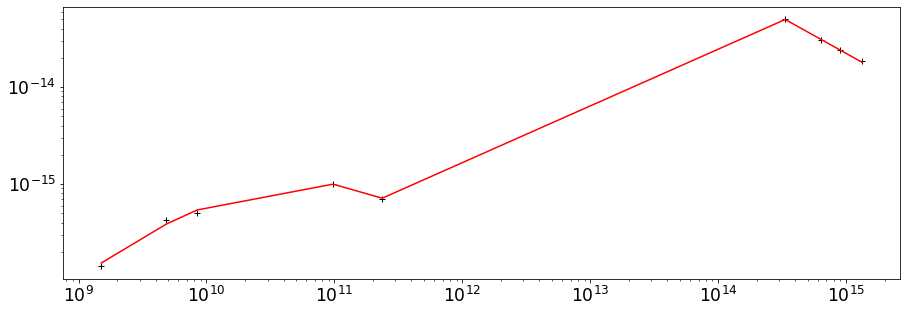

In [28]:
# do fit, here with the default leastsq algorithm
minner = Minimizer(fcn2min, params, fcn_args=(x, data))
result = minner.minimize()

# calculate final result
final = data + result.residual

# write error report
report_fit(result)

# try to plot results
try:
    import matplotlib.pyplot as plt
    plt.plot(x, data, 'k+')
    plt.plot(x, final, 'r')
    plt.yscale("log")
    plt.xscale("log")
    plt.show()
except ImportError:
    pass
# <end of examples/doc_parameters_basic.py>